# Lab Session \# 04


---


by Josué Obregón <br>
BDA712-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>

## Objective

The objective of this session is to improve our previous linear regression implementation by tweaking our training function with the gradient descent algorithm. 

Additionally we will implement multiple linear regression using more than one predictor.


# Getting the data

In [2]:
import gdown

In [1]:
!mkdir data

In [3]:
urls = ['https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G', # pizza.txt  https://drive.google.com/file/d/1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G/view?usp=sharing       
        'https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP', # pizza_2_vars.txt  https://drive.google.com/file/d/1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP/view?usp=sharing      
        'https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe', # pizza_3_vars.txt  https://drive.google.com/file/d/12mp_1uPGEIyW334Znp33RIPHoirFNrYe/view?usp=sharing       
      ]
outputs = ['pizza.txt','pizza_2_vars.txt','pizza_3_vars.txt']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G
To: /content/data/pizza.txt
100%|██████████| 232/232 [00:00<00:00, 104kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP
To: /content/data/pizza_2_vars.txt
100%|██████████| 360/360 [00:00<00:00, 123kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe
To: /content/data/pizza_3_vars.txt
100%|██████████| 468/468 [00:00<00:00, 747kB/s]


# Preliminaries

Let's import the data and prepare the variables that we will need for our laboratory

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = np.genfromtxt('data/pizza.txt', delimiter=',', skip_header=1)
X, Y = data[:,0], data[:,1]
print(X.shape)
print(Y.shape)

(30,)
(30,)


Let's define our previous functions

In [6]:
def predict(X, w, b):
  return X * w + b

def loss(X, Y, w, b):
  return np.average((predict(X, w, b) - Y) ** 2)

def train_old(X, Y, iterations, lr):
  w = 0
  b = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w, b)
    print(f'Iteration {i} => Loss (MSE): {current_loss:.6f}')
    if loss(X, Y, w + lr, b) < current_loss:
      w += lr
    elif loss(X, Y, w - lr, b) < current_loss:
      w -= lr
    elif loss(X, Y, w, b + lr) < current_loss:
      b += lr
    elif loss(X, Y, w, b - lr) < current_loss:
      b -= lr
    else:
      print(f'Best w: {w}, Best b: {b}')
      return w, b
  print(f'Best w: {w}, Best b: {b}')
  raise Exception(f'Couldn\'t converge within {iterations} iterations')

Alright, let's get right into business!

# Gradient descent

---
Remember that the mean squared error loss function is defined by:

$L=\frac{1}{m} \sum_{i=1}^{m} (wx_i + b - y_i)^2$

and getting the partial derivatives of L with respect to $w$ and $b$ gives us:

* $\frac{\partial{L}}{\partial{w}}=\frac{2}{m} \sum_{i=1}^{m} x_i(wx_i + b - y_i)$

* $\frac{\partial{L}}{\partial{b}}=\frac{2}{m} \sum_{i=1}^{m} (wx_i + b - y_i)$

So now let's code the gradient function:

In [8]:
def gradient(X, Y, w, b): 
  w_gradient = 2 * np.mean(X*(predict(X,w,b) - Y))
  b_gradient = 2 * np.mean((predict(X,w,b) - Y))
  return w_gradient,b_gradient

And our train function 

In [9]:
def train(X, Y, iterations, lr): 
  w = 0 
  b = 0 
  for i in range(iterations): 
    print(f'iteration {i} => Loss(MSE) {loss(X, Y, w, b) : .20f}')
    w_gradient,b_gradient = gradient(X, Y, w, b)
    w -= w_gradient * lr
    b -= b_gradient * lr
  return w,b 


Let's try our new function. Play around a bit and let's share our results

In [11]:
w, b = train(X, Y, iterations = 1000, lr = 0.0001)

iteration 0 => Loss(MSE)  812.86666666666667424579
iteration 1 => Loss(MSE)  748.92055356156436118908
iteration 2 => Loss(MSE)  690.46609232513151255262
iteration 3 => Loss(MSE)  637.03162773856422518293
iteration 4 => Loss(MSE)  588.18601309881103134103
iteration 5 => Loss(MSE)  543.53513110971584865183
iteration 6 => Loss(MSE)  502.71871357943120983691
iteration 7 => Loss(MSE)  465.40743426086487488647
iteration 8 => Loss(MSE)  431.30025137603519169716
iteration 9 => Loss(MSE)  400.12197838001611671643
iteration 10 => Loss(MSE)  371.62106336192158551057
iteration 11 => Loss(MSE)  345.56755916394916994250
iteration 12 => Loss(MSE)  321.75126783850708989121
iteration 13 => Loss(MSE)  299.98004447023976126729
iteration 14 => Loss(MSE)  280.07824667576602450936
iteration 15 => Loss(MSE)  261.88531726946916933230
iteration 16 => Loss(MSE)  245.25448865826086830566
iteration 17 => Loss(MSE)  230.05159851051902819563
iteration 18 => Loss(MSE)  216.15400714232137602266
iteration 19 => Loss(M

In [12]:
x_new = 20 
print(f'w = {w}, b = {b}')
print(f'Prediction : x = {x_new}, ==> y = {predict(x_new, w, b): .2f}')

w = 1.7992324268799047, b = 0.7830657190063337
Prediction : x = 20, ==> y =  36.77


In [13]:
%%time 
train_old(X,Y, iterations = 100000, lr = 0.0009)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 12513 => Loss (MSE): 27.707138
Iteration 12514 => Loss (MSE): 27.705090
Iteration 12515 => Loss (MSE): 27.703043
Iteration 12516 => Loss (MSE): 27.700998
Iteration 12517 => Loss (MSE): 27.698955
Iteration 12518 => Loss (MSE): 27.696913
Iteration 12519 => Loss (MSE): 27.694873
Iteration 12520 => Loss (MSE): 27.692834
Iteration 12521 => Loss (MSE): 27.690797
Iteration 12522 => Loss (MSE): 27.690790
Iteration 12523 => Loss (MSE): 27.688734
Iteration 12524 => Loss (MSE): 27.686680
Iteration 12525 => Loss (MSE): 27.684627
Iteration 12526 => Loss (MSE): 27.682576
Iteration 12527 => Loss (MSE): 27.680527
Iteration 12528 => Loss (MSE): 27.678479
Iteration 12529 => Loss (MSE): 27.676433
Iteration 12530 => Loss (MSE): 27.674389
Iteration 12531 => Loss (MSE): 27.672346
Iteration 12532 => Loss (MSE): 27.670305
Iteration 12533 => Loss (MSE): 27.668265
Iteration 12534 => Loss (MSE): 27.666227
Iteration 12535 => Loss (MSE): 27.664191
Iteration 12536 => Lo

(1.0827000000000022, 13.152599999996909)

Let's check the best result

In [14]:
%%time
train(X,Y, iterations = 100, lr=0.0009)

iteration 0 => Loss(MSE)  812.86666666666667424579
iteration 1 => Loss(MSE)  340.68878515338667511969
iteration 2 => Loss(MSE)  167.92456919776569179703
iteration 3 => Loss(MSE)  104.69475272938537102618
iteration 4 => Loss(MSE)  81.53588510010575873821
iteration 5 => Loss(MSE)  73.03618187005717743432
iteration 6 => Loss(MSE)  69.89926079069780939790
iteration 7 => Loss(MSE)  68.72423029847070097276
iteration 8 => Loss(MSE)  68.26694366338534791794
iteration 9 => Loss(MSE)  68.07225519467809249363
iteration 10 => Loss(MSE)  67.97365911403348093245
iteration 11 => Loss(MSE)  67.91024265876988863511
iteration 12 => Loss(MSE)  67.85972211393668374058
iteration 13 => Loss(MSE)  67.81394541260229402724
iteration 14 => Loss(MSE)  67.76993026260431918217
iteration 15 => Loss(MSE)  67.72658562829515460635
iteration 16 => Loss(MSE)  67.68351235161219392467
iteration 17 => Loss(MSE)  67.64056438379743951828
iteration 18 => Loss(MSE)  67.59768827098542942622
iteration 19 => Loss(MSE)  67.5548644

(1.8030530957244586, 0.7171488702611537)

Let's plot the line

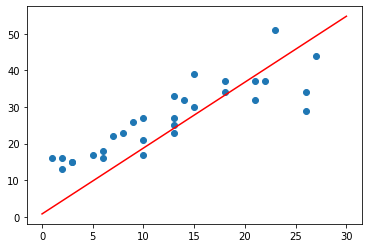

In [16]:
x_line = np.linspace(0,30, 100)
y_line = w*x_line+b

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line,'r')
plt.show()

## Visualizing training history

Let's improve our train functino with two more functionalities:

* First, we will add a stop criterion. With GD, the loss could in theory decrease forever, inching toward the minimum in smaller and smaller steps, without ever quite reaching it. So, when should we stop making
those ever-tinier steps?
  * We could decide to stop when the gradient becomes small enough. We will use a paramter name precision for this
* We will also return the training history, including values of w, b and loss at each step

Let's do it!

In [17]:
def train_with_history(X, Y, iterations, lr=0.001, precision=1e-6, 
                       initial_w=0, initial_b=0):
  w = initial_w
  b = initial_b

  previous_loss = loss(X, Y, w, b)
  history = [[w, b, previous_loss]]
  
  for i in range(iterations):
    print(f'Iteration {i} => Loss(MSE){loss(X,Y, w, b):.20f}')
    w_gradient, b_gradient = gradient(X, Y, w, b)
    w -= w_gradient * lr
    b -= b_gradient * lr

    current_loss = loss(X, Y, w, b)
    history.append([w, b, current_loss])

    if (abs(current_loss - previous_loss)) < precision:
      return w,b, history

    previous_loss = current_loss

  print(f'Couldn\'t converge within {iterations} iterations. Last w: {w}, b:{b}')  
  return w,b, history

In [18]:
w, b, history = train_with_history(X, Y, iterations=10000, lr=0.001,precision=1e-3, initial_w=-10, initial_b=-100)
print(w, b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 2693 => Loss(MSE)214.17535159779359332788
Iteration 2694 => Loss(MSE)213.97196909241887397002
Iteration 2695 => Loss(MSE)213.76880277832714227770
Iteration 2696 => Loss(MSE)213.56585242571171079362
Iteration 2697 => Loss(MSE)213.36311780501009138789
Iteration 2698 => Loss(MSE)213.16059868690390999291
Iteration 2699 => Loss(MSE)212.95829484231833816921
Iteration 2700 => Loss(MSE)212.75620604242243416593
Iteration 2701 => Loss(MSE)212.55433205862792078733
Iteration 2702 => Loss(MSE)212.35267266259020857433
Iteration 2703 => Loss(MSE)212.15122762620680418877
Iteration 2704 => Loss(MSE)211.94999672161804937787
Iteration 2705 => Loss(MSE)211.74897972120643885319
Iteration 2706 => Loss(MSE)211.54817639759633607355
Iteration 2707 => Loss(MSE)211.34758652365380271476
Iteration 2708 => Loss(MSE)211.14720987248639971767
Iteration 2709 => Loss(MSE)210.94704621744293149277
Iteration 2710 => Loss(MSE)210.74709533211279222087
Iteration 2711 => Loss(MSE)2

In [19]:
history = np.array(history)
history_w = history[:, 0]
history_b = history[:, 1]
history_loss = history[:, 2]

Now let's plot our first learning curve!
  It is just a simple curve to visualize how the loss behaves at each iteration

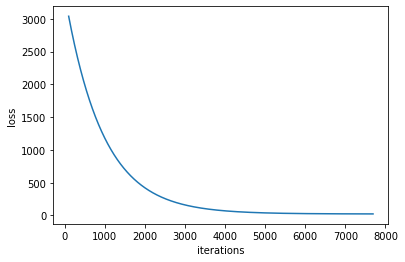

In [20]:
start_iteration = 100
x_iterations = range(start_iteration, history.shape[0])

plt.figure()
plt.plot(x_iterations, history_loss[start_iteration:], 'tab:blue')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

Finally, we will check the following code. 
It is a quick visualization program to plot the algorithm’s path, from an arbitrary starting point to the minimum loss. We just learned an intuitive understanding of gradient descent , but nothing beats watching it in motion as  shown in the graph on page 42 of the book.

In [21]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# Prepare matrices for 3D plot (W, B and L for weights, biases and losses)
MESH_SIZE = 20
weights = np.linspace(np.min(history_w) - 10, np.max(history_w) + 10,
                      MESH_SIZE)
biases = np.linspace(np.min(history_b) - 100, np.max(history_b) + 100,
                     MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
print(L.shape)

(20, 20)


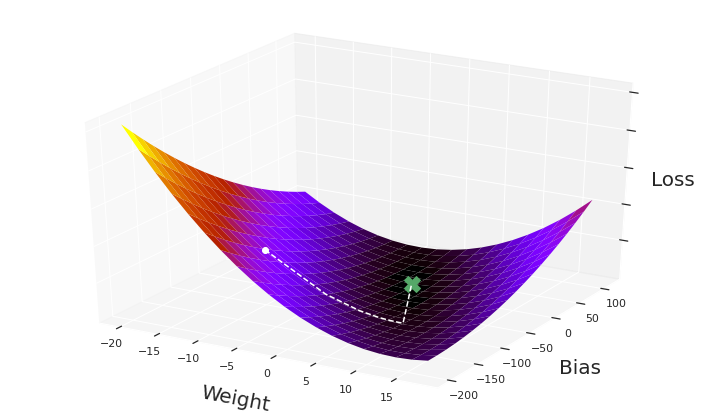

In [23]:
# Plot surface
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Weight", labelpad=20, fontsize=20)
ax.set_ylabel("Bias", labelpad=20, fontsize=20)
ax.set_zlabel("Loss", labelpad=5, fontsize=20)
ax.plot_surface(W, B, L, cmap=cm.gnuplot,
                linewidth=0, antialiased=True, color='black')

# Mark endpoint
plt.plot([history_w[-1]], [history_b[-1]], [history_loss[-1]],
         "gX", markersize=16)

plt.plot([history_w[0]], [history_b[0]], [history_loss[0]], "wo")
plt.plot(history_w, history_b, history_loss, color="w", linestyle="dashed")

plt.tight_layout()
plt.show()


Before we move on to the next topic, let's do an exercise.

* Try to make the algorithm to fail

## Summary

In the first part of our notebook we learned:

*  We investigated gradient descent, the most widely used algorithm to miminize loss.

* No matter how complicated our model and dataset are, gradient descent always works the same way: 
  * It takes a step in the opposite direction as the gradient of the loss, and keeps doing that until the gradient becomes small. 
  * To find the gradient, we took the partial derivatives of the loss with respect to $w$ and $b$.

* GD has a few limitations:
  * In particular, being based on derivatives, it expects that the loss function is smooth and without gaps, so that you can calculate its derivative anywhere. 
  * Also, GD can get stuck in a local minimum, failing to reach the global minimum. To avoid those problems, we’ll try to use smooth
loss functions that have only one minimum.

* GD is not the be all and end all of the algorithms that minimize loss. 
  * Researchers are exploring alternative algorithms that do better in some circumstances.
  * There are also variations of plain vanilla GD, some of which we’ll meet later in our course. Nonetheless, GD is still a crucial algorithm in modern ML, and it’s likely to keep that spot for a while.

# Multiple linear regression



First, let’s see what happens to linear regression when we move from one to
two input variables. You know that linear regression is about approximating
the examples with a line. Remember that the equation looks like this:

  $\hat{y}=x*w+b$

 And it looks like this:

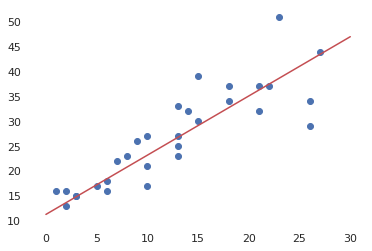

In [24]:
x_line = np.linspace(0,30, 100)
y_line = w*x_line+b

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line,'r')
plt.show()

Let's load the pizza_2_vars.txt into our variables

In [25]:
data2 = np.genfromtxt('data/pizza_2_vars.txt', delimiter =',' ,skip_header=1)
X, Y = data2[:, 0:2], data2[:, -1]
print(X.shape)
print(Y.shape)

(30, 2)
(30,)


In [26]:
X 

array([[13., 26.],
       [ 2., 14.],
       [14., 20.],
       [23., 25.],
       [13., 24.],
       [ 1., 12.],
       [18., 23.],
       [10., 18.],
       [26., 24.],
       [ 3., 14.],
       [ 3., 12.],
       [21., 27.],
       [ 7., 17.],
       [22., 21.],
       [ 2., 12.],
       [27., 26.],
       [ 6., 15.],
       [10., 21.],
       [18., 18.],
       [15., 26.],
       [ 9., 20.],
       [26., 25.],
       [ 8., 21.],
       [15., 22.],
       [10., 20.],
       [21., 21.],
       [ 5., 12.],
       [ 6., 14.],
       [13., 19.],
       [13., 20.]])

In [27]:
Y

array([44., 23., 28., 60., 42.,  5., 51., 44., 42.,  9., 14., 43., 22.,
       34., 16., 46., 26., 33., 29., 43., 37., 62., 47., 38., 22., 29.,
       34., 38., 30., 28.])

If we add a second input variable (in our case, the temperature), then the examples aren’t laying on a plane anymore—they’re points in three-dimensional  space. To approximate them, we can use the equivalent of a line, with one more dimension—a plane

Like we did for the line, we can calculate $\hat{y}$ by using the equation of a plane. That’s similar to the equation of a line—but it has two input variables, $x1$ and $x2$, and two weights, $w1$ and $w2$:

 $\hat{y}=x1*w1+x2*w2+b$

Let's explore how it looks like in the next graph:

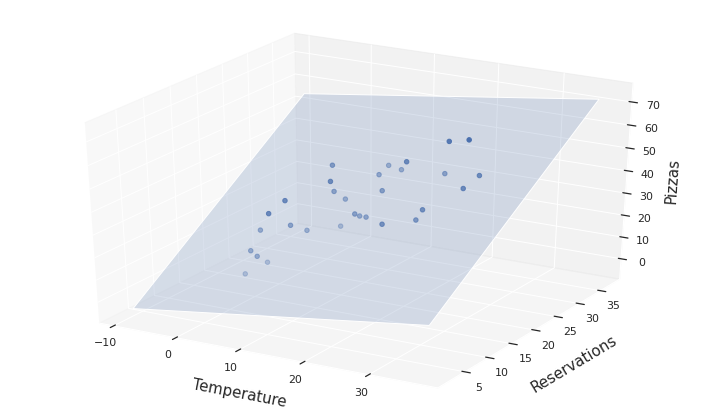

In [28]:
x1 = X[:,0]
x2 = X[:,1]

# These weights came out of the training phase
w = np.array([-3.98230894, 0.37333539, 1.69202346])

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=15)

# Plot the data points
ax.scatter(x1, x2, Y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.tight_layout()
plt.show()


In Roberto’s dataset, $x1$ is the number of reservations and
$x2$ is the temperature. It makes sense that the reservations and the temperature have different impacts on the number of pizzas, so they must have different weights.

In the equation of a line, the bias $b$ shifts the line away from the origin. The same goes for a plane: if we didn’t have $b$, then the plane would be constrained to pass by the origin of the axes.


Now see what happens when Roberto adds yet another column to his dataset:

In [29]:
data3 = np.genfromtxt('data/pizza_3_vars.txt', delimiter =',' ,skip_header=1)
X, Y = data3[:, 0:3], data3[:, -1]
print(X.shape)
print(Y.shape)

(30, 3)
(30,)


In [30]:
X

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.],
       [23., 25.,  9.],
       [13., 24.,  8.],
       [ 1., 12.,  2.],
       [18., 23.,  9.],
       [10., 18., 10.],
       [26., 24.,  3.],
       [ 3., 14.,  1.],
       [ 3., 12.,  3.],
       [21., 27.,  5.],
       [ 7., 17.,  3.],
       [22., 21.,  1.],
       [ 2., 12.,  4.],
       [27., 26.,  2.],
       [ 6., 15.,  4.],
       [10., 21.,  7.],
       [18., 18.,  3.],
       [15., 26.,  8.],
       [ 9., 20.,  6.],
       [26., 25.,  9.],
       [ 8., 21., 10.],
       [15., 22.,  7.],
       [10., 20.,  2.],
       [21., 21.,  1.],
       [ 5., 12.,  7.],
       [ 6., 14.,  9.],
       [13., 19.,  4.],
       [13., 20.,  3.]])

In [31]:
Y = Y.reshape(-1,1)
Y.shape

(30, 1)

In the book, the author explains with more detail what are matrix multiplications and some other topics. If you are struggling understanding those topics, you can check Chapter 4 of the book, or some resources on the internet. I will skip this part.

Let's start working only with weights (we will talk about the bias after this)
Now let's update some functions

* `predict` function
* `loss` function
* `gradient` function
* `train` function

In [32]:
def predict(X, w):
  return np.matmul(X,w)

In [33]:
def loss(X, Y, w):
  return np.mean((predict(X,w)-Y)**2)

You can check this [link](https://nusco.medium.com/of-gradients-and-matrices-1b19de65e5cd) for more details about the new gradient function

In [34]:
def gradient(X, Y, w):
  return 2 * np.matmul(X.T, (predict(X,w)-Y)) / X.shape[0]

In [35]:
def train(X,Y, iterations, lr):
  w = np.zeros((X.shape[1],1))
  for i in range(iterations):
    print(f'Iteration {i} => Loss (MSE): {loss(X,Y,w):.10f}')
    w-= gradient(X,Y,w) * lr
  return w

Let's add a precision parameter

In [36]:
def train(X, Y, iterations, lr, precision=1e-6):
  w = np.zeros((X.shape[1], 1))
  previous_loss = loss(X, Y, w) # add this line
  for i in range(iterations):    
    print(f'Iteration {i} => Loss(MSE): {previous_loss:.10f}')
    w -= gradient(X, Y, w) * lr

    current_loss = loss(X, Y, w)
    if (abs(current_loss - previous_loss) < precision):
      return w
    previous_loss = current_loss

  return w

In [37]:
w = train(X,Y, iterations=10000, lr=0.001)

Iteration 0 => Loss(MSE): 1333.5666666667
Iteration 1 => Loss(MSE): 151.1431136188
Iteration 2 => Loss(MSE): 64.9946080866
Iteration 3 => Loss(MSE): 57.2691562662
Iteration 4 => Loss(MSE): 55.2329817467
Iteration 5 => Loss(MSE): 53.6824684737
Iteration 6 => Loss(MSE): 52.2396865457
Iteration 7 => Loss(MSE): 50.8720490875
Iteration 8 => Loss(MSE): 49.5721379442
Iteration 9 => Loss(MSE): 48.3347816093
Iteration 10 => Loss(MSE): 47.1553762817
Iteration 11 => Loss(MSE): 46.0297285724
Iteration 12 => Loss(MSE): 44.9540103944
Iteration 13 => Loss(MSE): 43.9247250041
Iteration 14 => Loss(MSE): 42.9386766851
Iteration 15 => Loss(MSE): 41.9929432745
Iteration 16 => Loss(MSE): 41.0848512337
Iteration 17 => Loss(MSE): 40.2119530253
Iteration 18 => Loss(MSE): 39.3720065826
Iteration 19 => Loss(MSE): 38.5629566766
Iteration 20 => Loss(MSE): 37.7829180046
Iteration 21 => Loss(MSE): 37.0301598411
Iteration 22 => Loss(MSE): 36.3030921055
Iteration 23 => Loss(MSE): 35.6002527154
Iteration 24 => Loss(MS

In [38]:
X.shape

(30, 3)

## Dealing with the bias

So far, we implemented this prediction formula:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3$

Now we want to add the bias back to the system, like this:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + b$

We could rush to the code and add the bias everywhere, like we had done before —but hold on a minute. I can teach you a trick to roll the
bias into the code more smoothly.

Give another look at the previous formula. What’s the difference between the
bias and the weights? The only difference is this: 
* The weights are multiplied by some input variable $x$, and the bias is not.

Now imagine that there is one more input variable in the system (let’s call it x0) that always has a value of 1. We can rewrite the formula like this:

* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + x0 * b$

Now there’s no difference at all between bias and weights. The bias is just
the weight of an input variable that happens to have the constant value 1.

So we can add a dummy input variable with the constant value 1, and we won’t need an explicit bias anymore.

Let's do this

In [39]:
X = np.column_stack((np.ones(X.shape[0]),X))
X.shape

(30, 4)

In [40]:
X

array([[ 1., 13., 26.,  9.],
       [ 1.,  2., 14.,  6.],
       [ 1., 14., 20.,  3.],
       [ 1., 23., 25.,  9.],
       [ 1., 13., 24.,  8.],
       [ 1.,  1., 12.,  2.],
       [ 1., 18., 23.,  9.],
       [ 1., 10., 18., 10.],
       [ 1., 26., 24.,  3.],
       [ 1.,  3., 14.,  1.],
       [ 1.,  3., 12.,  3.],
       [ 1., 21., 27.,  5.],
       [ 1.,  7., 17.,  3.],
       [ 1., 22., 21.,  1.],
       [ 1.,  2., 12.,  4.],
       [ 1., 27., 26.,  2.],
       [ 1.,  6., 15.,  4.],
       [ 1., 10., 21.,  7.],
       [ 1., 18., 18.,  3.],
       [ 1., 15., 26.,  8.],
       [ 1.,  9., 20.,  6.],
       [ 1., 26., 25.,  9.],
       [ 1.,  8., 21., 10.],
       [ 1., 15., 22.,  7.],
       [ 1., 10., 20.,  2.],
       [ 1., 21., 21.,  1.],
       [ 1.,  5., 12.,  7.],
       [ 1.,  6., 14.,  9.],
       [ 1., 13., 19.,  4.],
       [ 1., 13., 20.,  3.]])

In [41]:
w = train(X,Y, iterations=10000, lr=0.001)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 5000 => Loss(MSE): 6.8036141152
Iteration 5001 => Loss(MSE): 6.8035999077
Iteration 5002 => Loss(MSE): 6.8035857020
Iteration 5003 => Loss(MSE): 6.8035714983
Iteration 5004 => Loss(MSE): 6.8035572965
Iteration 5005 => Loss(MSE): 6.8035430966
Iteration 5006 => Loss(MSE): 6.8035288987
Iteration 5007 => Loss(MSE): 6.8035147026
Iteration 5008 => Loss(MSE): 6.8035005085
Iteration 5009 => Loss(MSE): 6.8034863162
Iteration 5010 => Loss(MSE): 6.8034721259
Iteration 5011 => Loss(MSE): 6.8034579375
Iteration 5012 => Loss(MSE): 6.8034437510
Iteration 5013 => Loss(MSE): 6.8034295664
Iteration 5014 => Loss(MSE): 6.8034153837
Iteration 5015 => Loss(MSE): 6.8034012030
Iteration 5016 => Loss(MSE): 6.8033870241
Iteration 5017 => Loss(MSE): 6.8033728472
Iteration 5018 => Loss(MSE): 6.8033586722
Iteration 5019 => Loss(MSE): 6.8033444990
Iteration 5020 => Loss(MSE): 6.8033303278
Iteration 5021 => Loss(MSE): 6.8033161585
Iteration 5022 => Loss(MSE): 6.803301991

In [42]:
w

array([[1.15529777],
       [1.19801632],
       [0.06155888],
       [3.11116359]])

Which value is the bias?

## Summary

* The second part of the notebook was all about multiple linear regression. 

* We extended our program to datasets with more than one input variable—using multiple weights to match the input variables. 

* We also got rid of the explicit bias, turning it into just another weight. 

* Our learning program is now powerful enough to tackle real-world problems, although it doesn’t look any more complicated than it did before.

**Congratulations, you programmed a functional linear regression algorithm!!**